# WCE Curated Colon Disease Detection

* [Google Colab Notebook](https://colab.research.google.com/drive/1Jl-IMN04wFzDKZCti-B9M-Ic1gWd2Aat?usp=sharing)
* [Dataset](https://www.kaggle.com/datasets/francismon/curated-colon-dataset-for-deep-learning)


# Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the data

If you use google colab for training, you can use kaggle datasets directly with the help of a token. [Reference](https://www.kaggle.com/general/74235)

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/mcdonalds-india-menu-nutrition-facts    McDonald's India : Menu Nutrition Dataset          5KB  2022-07-28 17:08:52           2879        126  0.9411765        
iamsouravbanerjee/house-rent-prediction-dataset        House Rent Prediction Dataset                     82KB  2022-08-20 13:49:03           2884        113  1.0              
arianazmoudeh/airbnbopendata                           Airbnb Open Data                                  10MB  2022-08-01 15:58:10           1928         68  0.9705882        
ericsims/world-cheese-awards-worlds-cheesiest-dataset  World Cheese Awards (World's Ch

In [ ]:
!kaggle datasets download -d francismon/curated-colon-dataset-for-deep-learning

!mkdir /content/IMAGES
!unzip /content/curated-colon-dataset-for-deep-learning.zip -d /content/IMAGES

Streaming output truncated to the last 5000 lines.
  inflating: /content/IMAGES/train/0_normal/train_normal_ (28).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (280).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (281).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (282).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (283).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (284).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (285).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (286).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (287).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (288).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (289).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (29).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (290).jpg  
  inflating: /content/IMAGES/train/0_norm

In [ ]:
IMAGE_DIR = "/content/IMAGES/"

In [ ]:
# Create a list of all the class names
import os

class_names = sorted(os.listdir(IMAGE_DIR+"train/"))
class_names

['0_normal', '1_ulcerative_colitis', '2_polyps', '3_esophagitis']

In [ ]:
# Defining the training, validation and testing directories
IMAGE_DIR = "/content/IMAGES/"

TRAIN_DIR = "/content/IMAGES/train/"
VAL_DIR = "/content/IMAGES/val/"
TEST_DIR = "/content/IMAGES/test/"

# View images in training dataset

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_images(dirpath, class_names=class_names):
  """
  A utility function to view random images and their labels from the specified directory
  """
  plt.figure(figsize=(20, 14))
  for i in range(1, 6):
    class_name = random.choice(class_names)

    img = mpimg.imread(dirpath+class_name+"/"+random.choice(os.listdir(dirpath+class_name)))
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis(False)
    

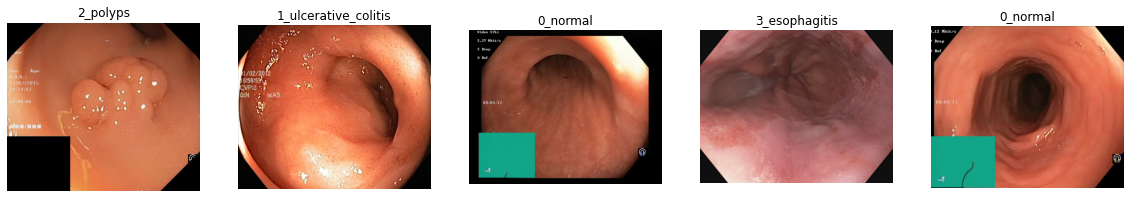

In [ ]:
view_random_images(TRAIN_DIR, class_names=class_names)

# Create ImageDataGenerators

Create ImageDataGenerators to Rescale our images between 0 and 1 i.e., **Normalizing** the images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

Creating training, validation and testing data

In [ ]:
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

val_data = val_datagen.flow_from_directory(VAL_DIR,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode="categorical")

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# Creating a basic model

In [ ]:
import tensorflow as tf

In [ ]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
Total params: 602,156
Trainable params: 602,156
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/5
100/100 [==============================] - 71s 689ms/step - loss: 1.4275 - accuracy: 0.2453 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/5
100/100 [==============================] - 69s 697ms/step - loss: 1.3864 - accuracy: 0.2463 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/5
100/100 [==============================] - 62s 624ms/step - loss: 1.3864 - accuracy: 0.2362 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/5
100/100 [==============================] - 61s 609ms/step - loss: 1.3864 - accuracy: 0.2416 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/5
100/100 [==============================] - 60s 602ms/step - loss: 1.3864 - accuracy: 0.2447 - val_loss: 1.3863 - val_accuracy: 0.2500


## Plot the curves

In [ ]:
def plot_curves(history):
  """
  A utility function that inputs a keras History object and plot the loss and accuracy (both training and validation) of the model 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.rcParams['font.size'] = '16'

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


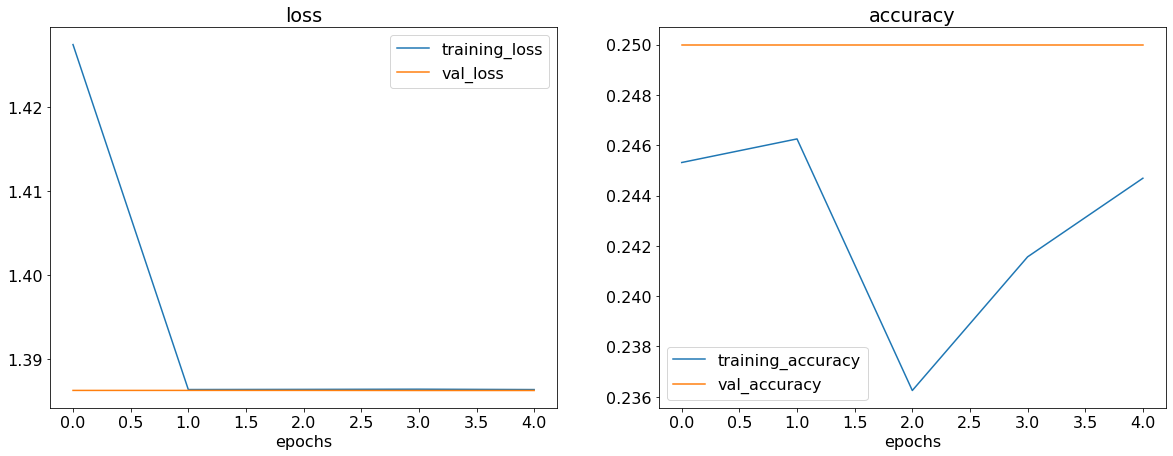

In [ ]:
plot_curves(history_1)

## Get predictions on testing data

In [ ]:
model_1.evaluate(test_data)

25/25 [==============================] - 10s 392ms/step - loss: 1.3863 - accuracy: 0.2500


[1.3862943649291992, 0.25]

## Save the model

In [ ]:
model_1.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/WCE Curated Colon Disease Detection models/model_1.h5")

# Improving the model (Adding Convolutional Layers)

In [ ]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1900964   
                                                                 
Total params: 1,903,064
Trainable params: 1,903,064
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/5
100/100 [==============================] - 73s 634ms/step - loss: 0.9257 - accuracy: 0.8944 - val_loss: 1.0577 - val_accuracy: 0.7145
Epoch 2/5
100/100 [==============================] - 63s 631ms/step - loss: 0.0195 - accuracy: 0.9956 - val_loss: 2.0335 - val_accuracy: 0.7245
Epoch 3/5
100/100 [==============================] - 62s 617ms/step - loss: 0.0181 - accuracy: 0.9959 - val_loss: 2.7205 - val_accuracy: 0.7510
Epoch 4/5
100/100 [==============================] - 63s 630ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 3.0531 - val_accuracy: 0.7560
Epoch 5/5
100/100 [==============================] - 64s 642ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 2.3345 - val_accuracy: 0.7555


## Plot the curves

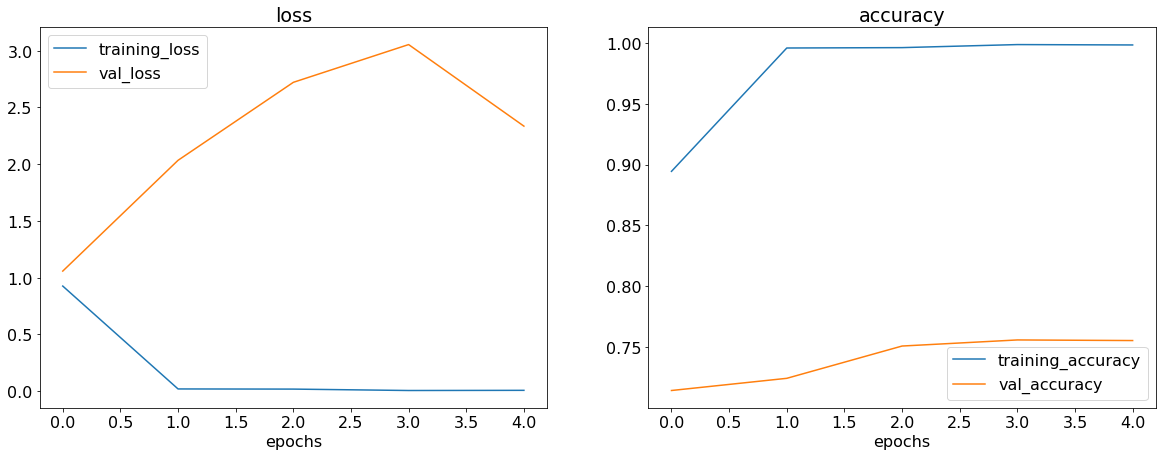

In [ ]:
plot_curves(history_2)

## Get predictions on testing data

In [ ]:
model_2.evaluate(test_data)

25/25 [==============================] - 10s 406ms/step - loss: 2.1899 - accuracy: 0.7750


[2.1898601055145264, 0.7749999761581421]

## Save the model

In [ ]:
model_2.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/WCE Curated Colon Disease Detection models/model_2.h5")

# Improving the model further (Adding MaxPooling Layers)

In [ ]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),                                   
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

## Train the model

In [ ]:
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/5
100/100 [==============================] - 62s 613ms/step - loss: 0.3994 - accuracy: 0.8447 - val_loss: 0.6030 - val_accuracy: 0.6965
Epoch 2/5
100/100 [==============================] - 77s 773ms/step - loss: 0.0872 - accuracy: 0.9691 - val_loss: 0.8973 - val_accuracy: 0.7425
Epoch 3/5
100/100 [==============================] - 60s 602ms/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 1.6354 - val_accuracy: 0.7430
Epoch 4/5
100/100 [==============================] - 61s 611ms/step - loss: 0.0233 - accuracy: 0.9931 - val_loss: 0.8304 - val_accuracy: 0.7555
Epoch 5/5
100/100 [==============================] - 61s 614ms/step - loss: 0.0167 - accuracy: 0.9972 - val_loss: 2.1015 - val_accuracy: 0.7425


## Plot the curves

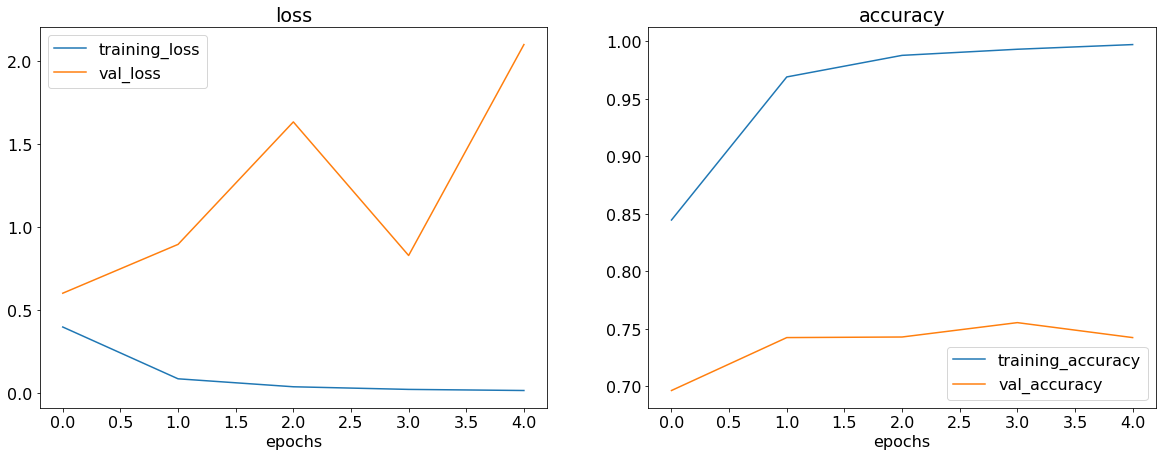

In [ ]:
plot_curves(history_3)

## Get predictions on testing data

In [ ]:
model_3.evaluate(test_data)

25/25 [==============================] - 10s 393ms/step - loss: 2.0750 - accuracy: 0.7425


[2.0750210285186768, 0.7425000071525574]

## Save the model

In [ ]:
model_3.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/WCE Curated Colon Disease Detection models/model_3.h5")

# Transfer Learning

In [ ]:
import tensorflow_hub as hub

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
model_4 = tf.keras.models.Sequential([
    hub.KerasLayer(resnet_url,
                   trainable=False,
                   name='feature_extraction_layer',
                   input_shape=(224, 224)+(3,)),
    tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')                                  
    ])

model_4.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/5
100/100 [==============================] - 84s 692ms/step - loss: 0.2966 - accuracy: 0.8950 - val_loss: 0.2724 - val_accuracy: 0.8965
Epoch 2/5
100/100 [==============================] - 68s 683ms/step - loss: 0.0737 - accuracy: 0.9825 - val_loss: 0.2115 - val_accuracy: 0.9225
Epoch 3/5
100/100 [==============================] - 67s 668ms/step - loss: 0.0490 - accuracy: 0.9891 - val_loss: 0.1821 - val_accuracy: 0.9310
Epoch 4/5
100/100 [==============================] - 67s 670ms/step - loss: 0.0352 - accuracy: 0.9937 - val_loss: 0.1627 - val_accuracy: 0.9410
Epoch 5/5
100/100 [==============================] - 65s 656ms/step - loss: 0.0260 - accuracy: 0.9953 - val_loss: 0.1500 - val_accuracy: 0.9475


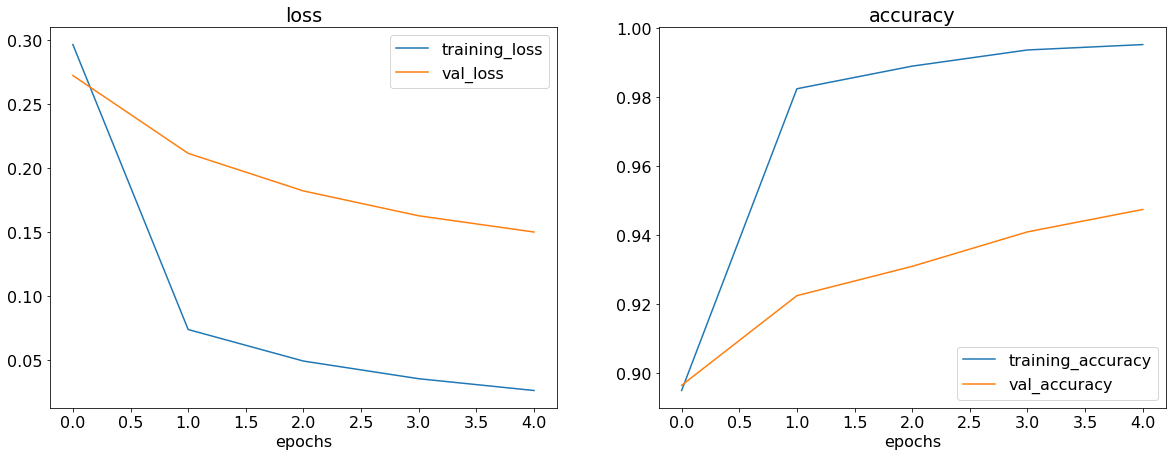

In [ ]:
plot_curves(history_4)

In [ ]:
model_4.evaluate(test_data)

25/25 [==============================] - 12s 471ms/step - loss: 0.1485 - accuracy: 0.9400


[0.14849461615085602, 0.9399999976158142]

In [ ]:
model_4.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/WCE Curated Colon Disease Detection models/model_4.h5")

# Training the transfer learning model for more epochs

In [ ]:
model_5 = tf.keras.models.clone_model(model_4)

model_5.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________


In [30]:
history_5 = model_5.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
100/100 [==============================] - 77s 739ms/step - loss: 0.3190 - accuracy: 0.8900 - val_loss: 0.2421 - val_accuracy: 0.9095
Epoch 2/20
100/100 [==============================] - 67s 676ms/step - loss: 0.0771 - accuracy: 0.9797 - val_loss: 0.1832 - val_accuracy: 0.9355
Epoch 3/20
100/100 [==============================] - 68s 679ms/step - loss: 0.0484 - accuracy: 0.9912 - val_loss: 0.1823 - val_accuracy: 0.9365
Epoch 4/20
100/100 [==============================] - 67s 670ms/step - loss: 0.0345 - accuracy: 0.9937 - val_loss: 0.1615 - val_accuracy: 0.9455
Epoch 5/20
100/100 [==============================] - 66s 663ms/step - loss: 0.0264 - accuracy: 0.9959 - val_loss: 0.1961 - val_accuracy: 0.9235
Epoch 6/20
100/100 [==============================] - 66s 660ms/step - loss: 0.0203 - accuracy: 0.9969 - val_loss: 0.1548 - val_accuracy: 0.9420
Epoch 7/20
100/100 [==============================] - 66s 659ms/step - loss: 0.0161 - accuracy: 0.9984 - val_loss: 0.1403 - val_ac

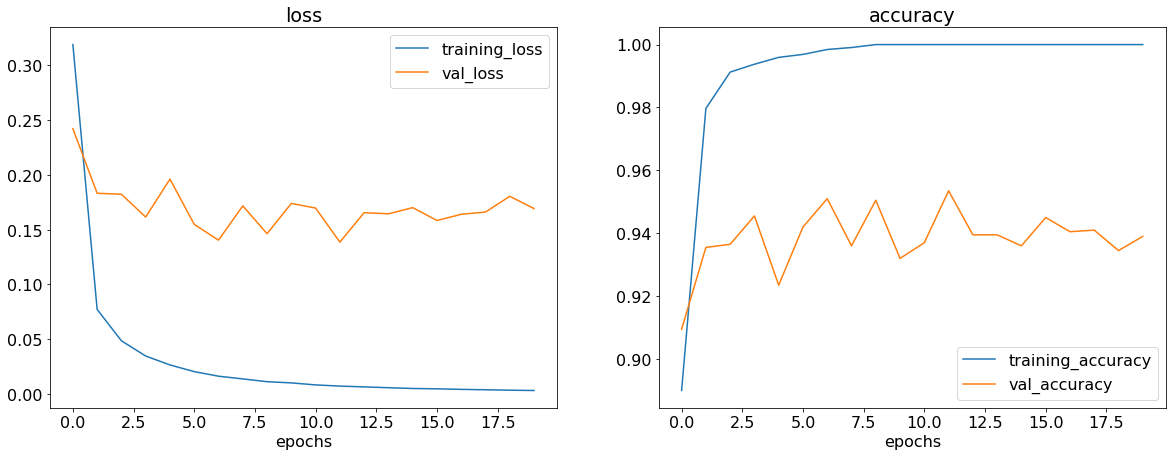

In [31]:
plot_curves(history_5)

In [32]:
model_5.evaluate(test_data)

25/25 [==============================] - 11s 429ms/step - loss: 0.1558 - accuracy: 0.9450


[0.15581388771533966, 0.9449999928474426]

In [33]:
model_5.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/WCE Curated Colon Disease Detection models/model_5.h5")

# Predict a random image from testing dataset

In [34]:
def pred_and_show(model, img_path, actual_class, class_names=class_names):
  """
  An utility function that uses the input model and makes prediction
  """
  # Read in the image
  img = tf.io.read_file(img_path)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  # Rescale the image (get all values betwen 0 & 1)
  img = img/255.

  pred = model.predict(tf.expand_dims(img, 0))

  if len(class_names) > 2:
    class_name = class_names[int(tf.argmax(pred[0]))]
  else:
    class_name = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Actual: {actual_class}\nPredicted: {class_name}")
  plt.axis(False)

In [35]:
def pred_random_image(model, dir_path=TEST_DIR, class_names=class_names):
  """
  This function selects a random image from the specified directory and then predicts the possible class by calling the pred_and_show function
  """
  random_class = random.choice(class_names)

  img_path = dir_path + random_class + "/" + random.choice(os.listdir(dir_path + random_class))
  
  pred_and_show(model, img_path, random_class, class_names)

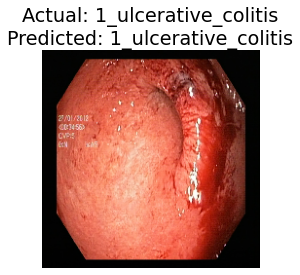

In [37]:
pred_random_image(model_5, TEST_DIR, class_names)